In [7]:
import sys
import os

import numpy as np

# Go one level up to the 'main' directory
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add this directory to the Python path
if project_root not in sys.path:
    sys.path.append(project_root)

import datetime

import pandas as pd

from portfolio import build_portfolio

start_date = datetime.datetime(2015, 12, 1)
end_date = "2015-12-31"

# d = {
#     0: {"Name": "GOOG", "Allocation": 20},
#     1: {"Name": "AMZN", "Allocation": 10},
#     2: {"Name": "MCD", "Allocation": 15},
#     3: {"Name": "DIS", "Allocation": 18},
# }
d = {
    0: {"Name": "GOOG", "Allocation": 20},
    1: {"Name": "AMZN", "Allocation": 10},
    2: {"Name": "MCD", "Allocation": 15},
    3: {"Name": "DIS", "Allocation": 18},
    # Added stocks:
    # 4: {"Name": "MSFT", "Allocation": 22},
    # 5: {"Name": "AAPL", "Allocation": 15}
}

print(d)
pf_allocation = pd.DataFrame.from_dict(d, orient="index")
names = pf_allocation["Name"].values.tolist()

pf = build_portfolio(
    names=names,
    pf_allocation=pf_allocation,
    start_date=start_date,
    end_date=end_date,
    data_api="yfinance",
    # market_index=market_index,
)

R = pf.comp_mean_returns()
Sigma = pf.comp_cov()*252

print(np.array(R))
print(Sigma)
pf.comp_sharpe()

d:\Guided quantum walk for portfolio optimization\main\portfolio.py:263: FutureWarning: YF.download() has changed argument auto_adjust default to True
  res: pd.DataFrame = yfinance.download(names, start=start_date, end=end_date)
[*********************100%***********************]  4 of 4 completed

{0: {'Name': 'GOOG', 'Allocation': 20}, 1: {'Name': 'AMZN', 'Allocation': 10}, 2: {'Name': 'MCD', 'Allocation': 15}, 3: {'Name': 'DIS', 'Allocation': 18}}
True
['Close']
[ 0.08226496  0.21403895  0.54455414 -0.91711223]
          GOOG      AMZN       MCD       DIS
GOOG  0.036724  0.041412  0.017071  0.031269
AMZN  0.041412  0.062407  0.017231  0.038689
MCD   0.017071  0.017231  0.015517  0.019364
DIS   0.031269  0.038689  0.019364  0.062288


-0.4381740152836264

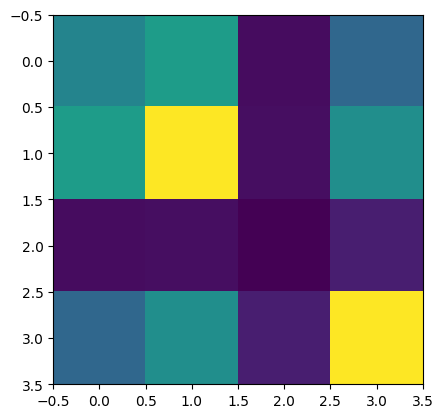

In [2]:
import matplotlib.pyplot as plt
plt.imshow(Sigma, interpolation='nearest')
plt.show()

In [3]:
from qiskit_finance.applications.optimization import PortfolioOptimization
from qiskit_optimization.converters import QuadraticProgramToQubo
# from qiskit.opflow import PauliSumOp
gamma = 0.5
B = 3
portfolio = PortfolioOptimization(expected_returns=np.array(R), covariances=np.array(Sigma), risk_factor=gamma, budget=B)
qp = portfolio.to_quadratic_program()

qubo_conv = QuadraticProgramToQubo()
qubo_prob = qubo_conv.convert(qp)

cost_op = qubo_prob.to_ising()[0]


In [4]:
# from qiskit_algorithms import NumPyMinimumEigensolver
# from qiskit_optimization.algorithms import MinimumEigenOptimizer
# exact_mes = NumPyMinimumEigensolver()
# exact_eigensolver =  MinimumEigenOptimizer(exact_mes)

# result = exact_eigensolver.solve(qubo_prob)
# print(result.prettyprint())

In [ ]:
from qiskit_algorithms import QAOA
from qiskit_aer.primitives import Sampler
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_algorithms.optimizers import COBYLA

cobyla = COBYLA()
cobyla.set_options(max_steps = 250)
qaoa = QAOA(sampler=Sampler(), optimizer=cobyla, reps=3)

optimizer = MinimumEigenOptimizer(qaoa)
result = optimizer.solve(qubo_prob) 

print(result.prettyprint())